<h1><center>Demo 1: Simulated Dataset</center></h1>

In this notebook we'll first be demoing the linear support vector machine implemented in the *base_estimators* library on the *Spam* dataset from Standford for binary classification We'll also demo the  one-vs-rest estimator in the *multiclass_estimators* library on the *Digits* dataset from scikit-learn for multiclassification.

In [67]:
import os
import sys

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets
from matplotlib import pyplot as plt

sys.path.append("../libraries")
import example_utils as examp
import base_estimators as base
import multiclass_estimators as multi

plt.rcParams["figure.figsize"] = (14,8)

## Binary Classification Estimators

### Create simulated data for binary classification

The dataset is created by giving each feature a unique mean for each class label, and drawing from a normal distribution with some variance for each instance.

This should be an easy dataset to fit.

In [64]:
def generate_data(n_classes=2, n_obs=10000, n_feats=100):

    features = []
    for _ in range(n_classes):
        feature_means = np.random.uniform(low=-20, high=20, size=n_feats)
        class_features = np.array([np.random.normal(size=n_obs, loc=feature_mean, scale=25) for feature_mean in feature_means]).T
        features.append(class_features)

    X = np.concatenate(features)
    y = np.array([[x]*n_obs for x in range(n_classes)]).flatten()
    
    # Change target to -1/+1 if binary
    if n_classes == 2:
        y[y==0] = -1
    # Divide the data into training and test sets. By default, 25% goes into the test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Standardize the data
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = generate_data()

### Fit linear support vector machine

Here we fit the model with default parameters (lambda = 1).

In [65]:
model = base.MyLinearSVM()
model.fit(X_train, y_train)

MyLinearSVM(eta_init=1, loss_function='squared-hinge', max_iter=100,
      reg_coef=1)

### Predict and check accuracy

In [60]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Binary Classification training accuracy: {}".format(accuracy_score(y_train, train_preds)))
print("Binary Classification testing accuracy: {}".format(accuracy_score(y_test, test_preds)))

Binary Classification training accuracy: 0.9995333333333334
Binary Classification testing accuracy: 0.9996


### Tune linear support vector machine

The class is scikit-learn compatible and can be used with other scikit-learn classes like GridSearchCV. Here we tune the regularization parameter, lambda.

In [45]:
# Regularization coefficient
grid = {"reg_coef": [0.01, 0.1, 1, 2]}
modcv = GridSearchCV(base.MyLinearSVM(), param_grid=grid, cv=3)
modcv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MyLinearSVM(eta_init=1, loss_function='squared-hinge', max_iter=100,
      reg_coef=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_coef': [0.01, 0.1, 1, 2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [46]:
train_preds = modcv.predict(X_train)
test_preds = modcv.predict(X_test)

print("Binary Classification training accuracy: {}".format(accuracy_score(y_train, train_preds)))
print("Binary Classification testing accuracy: {}".format(accuracy_score(y_test, test_preds)))

Binary Classification training accuracy: 0.9998666666666667
Binary Classification testing accuracy: 0.9996


### Visualize training results

Below is a plot showing the training and validation errors at different iterations during gradient descent. Notice that although the default number of iterations is 100, the problem converged (reached below the tolerance level of 1e-3) at around 25 iterations.

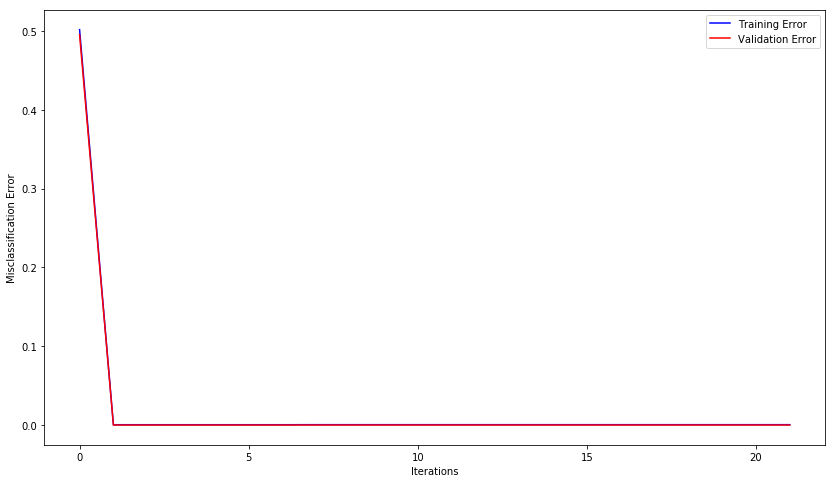

In [68]:
examp.plot_errors(model, X_train, y_train, X_test, y_test)

## Multiclassification Estimators

Now we demonstrate the *MyOneVsRestClassifier* implementation. It takes as arguments an instance of any scikit-learn compatible classifier (implements .fit, .predict, and .predict_proba).

It supports parallel computation of the labels by passing in an argument 'n_jobs'.

### Create data for multi-class classification

We'll be using the same code used in the first section to generate the data - this time with 20 classes.

In [70]:
X_train, y_train, X_test, y_test = generate_data(n_classes=20)

### Fit One-vs-Rest Multiclassifier with Linear SVMs

In [72]:
model = multi.MyOneVsRestClassifier(base.MyLinearSVM())
model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Multi-classification training accuracy: {}".format(accuracy_score(y_train, train_preds)))
print("Multi-classification testing accuracy: {}".format(accuracy_score(y_test, test_preds)))

Multi-classification training accuracy: 0.9886666666666667
Multi-classification testing accuracy: 0.98798
